# Credit Card Customers  Segmentation Using K-Means Analysis
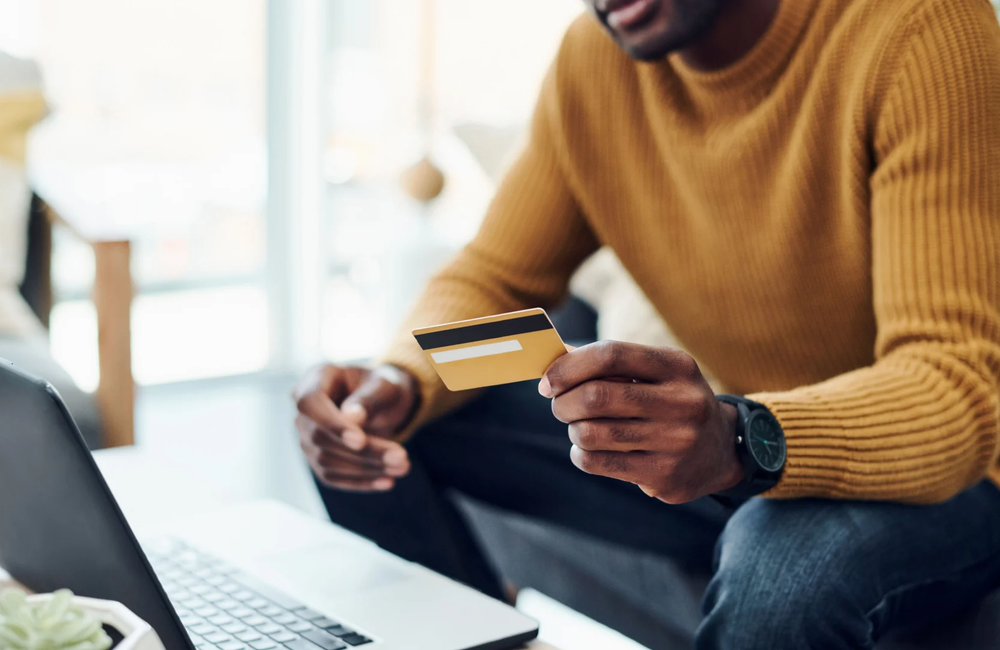
[Image Source](https://upgradedpoints.com/credit-cards/when-were-credit-cards-invented/)


Credit card companies employ their unique methodologies to make decisions regarding approvals, interest rates, and credit line limits. Higher credit limits expose the company to increased risk. Consequently, card issuers extend larger credit lines to individuals with established trustworthiness, such as those possessing higher credit scores, greater incomes, and other indicators of financial reliability.

To implement diverse strategies, companies require distinct customer groups. In this project, we will utilize K-means analysis on a dataset containing information about clients of a credit card company. Each client will be assigned to a group distinguished by unique characteristics. Our objectives are as follows:

1. Analyze the dataset.
2. Prepare the data for modeling.
3. Determine an optimal number of clusters.
4. Segment the data accordingly.
5. Interpret and elucidate the outcomes.

## Data
The dataset contains the following information:

| Name | Column Description| 
| :-----------: | :----------- |
|customer_id| unique identifier for each customer.
|age| customer age in years.
|gender| customer gender (M or F).
|dependent_count| number of dependents of each customer.
|education_level| level of education ("High School", "Graduate", etc.).
|marital_status| marital status ("Single", "Married", etc.).
|estimated_income| the estimated income for the customer projected by the data science team.
|months_on_book| time as a customer in months.
|total_relationship_count| number of times the customer contacted the company.
|months_inactive_12_mon| number of months the customer did not use the credit card in the last 12 months.
|credit_limit| customer's credit limit.
|total_trans_amount| the overall amount of money spent on the card by the customer.
|total_trans_count| the overall number of times the customer used the card.
|avg_utilization_ratio| daily average utilization ratio.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Read in the data
customer_df = pd.read_csv("customer_segmentation.csv")

# Dataframe information
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
# Print out the dataframe
customer_df

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


The dataset contains 10,127 entries, and there are no missing values. However, some columns are categorical, so we need to convert them to numeric if we intend to use them as features for our analysis. Additionally, the range of values in different columns is substantial, necessitating the normalization of each column to ensure that all features are given similar weighting.

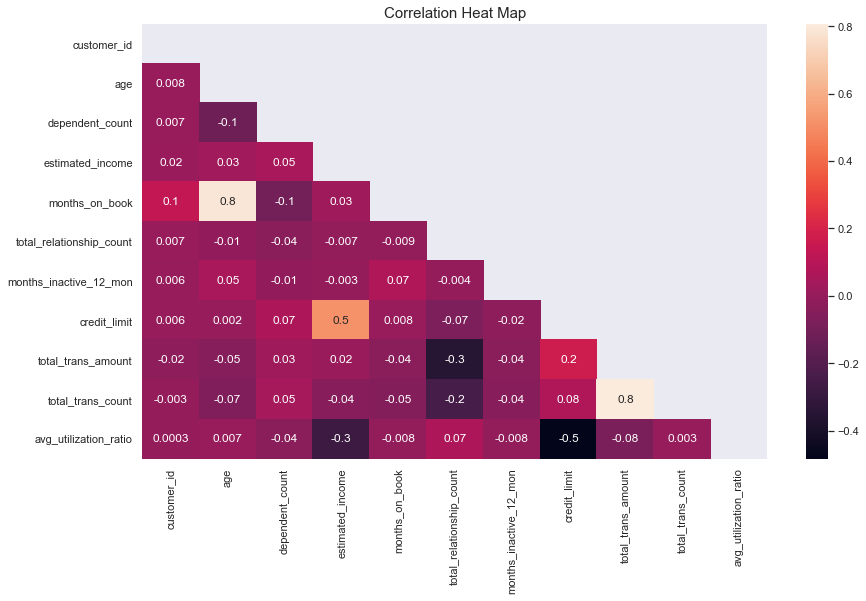

In [4]:
# Plot the correlation between different columns
# Calculate Pearson's correlation coefficient (CC)
corr = customer_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(14,8))
sns.set_theme()
heatmap = sns.heatmap(corr, annot=True, fmt='.1g',mask=matrix)
plt.title('Correlation Heat Map', fontsize=15)
plt.show()

The following columns exhibit relatively strong positive correlations with each other:
- 0.8: "months_on_book" and "age"
- 0.5: "credit_limit" and "estimated_income"

On the other hand, the following columns display a notable negative correlation:
- -0.5: "avg_utilization_ratio" and "credit_limit"

It's worth noting that the rest of the coefficients show very weak correlations.

Now, let's look at the distribution of each numeric column.

In [5]:
# Numeric information
customer_df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


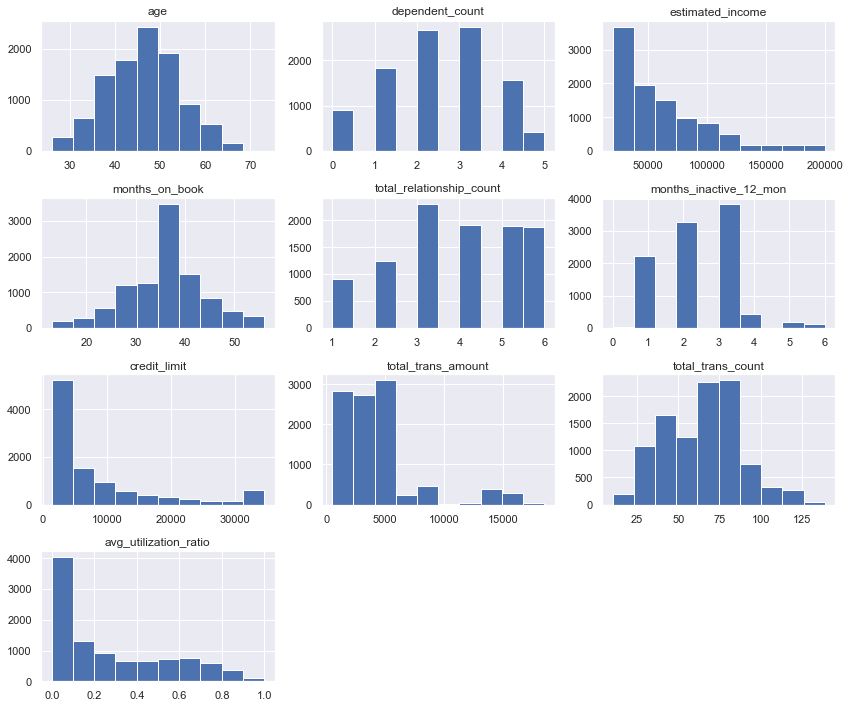

In [6]:
# Plot distribution of values in Marks column using histogram

import math

# Filter out the numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = customer_df.select_dtypes(include=numerics)
columns = num_df.columns[1:]

# Plot histogram for each numeric column
customer_df[columns].hist(figsize=(12,10))
plt.tight_layout()
plt.show()


The following features stand out on the distribution plots:
- Some of the variables appear to follow a normal distribution, while the majority are skewed.
- Most customers have been on the books for approximately 35-40 months (`months_on_book`).
- The majority of customers have been inactive for less than 4 months in the past 12 months (`months_inactive_12_month`).
- Most customers have a credit limit of less than \$5000 (`credit_limit`).
- Total transaction amounts are mostly less than approximately \$6000 (`total_trans_amount`).
- The daily utilization ratio is primarily less than 0.1 (`avg_utilization`).

## Feature Engineering

Let's begin addressing the categorical columns, which include gender, education level, and marital status.

In [7]:
customer_df[['gender','education_level','marital_status']].head(10)

,gender,education_level,marital_status
0,M,High School,Married
1,F,Graduate,Single
2,M,Graduate,Married
3,F,High School,Unknown
4,M,Uneducated,Married
5,M,Graduate,Married
6,M,High School,Married
7,M,High School,Unknown
8,M,Uneducated,Single
9,M,Graduate,Single


In [8]:
# Print out the unique values in the categorical columns
print(f"Gender:\n{customer_df['gender'].value_counts()}")
print(f"\nEducation Level:\n{customer_df['education_level'].value_counts()}")
print(f"\nMarital Status:\n{customer_df['marital_status'].value_counts()}")

Gender:
F    5358
M    4769
Name: gender, dtype: int64

Education Level:
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Marital Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64


The gender column contains only two distinct values, "M" and "F." This allows for a straightforward replacement, where "M" becomes 1, and "F" becomes 0 for all rows.

Regarding the education_level column, it encompasses six unique values, each signifying different levels of education. We can assign numerical values to these levels while preserving their order, making replacement more manageable. Here's the mapping:
- Uneducated: 0
- High School: 1
- College: 2
- Graduate: 3
- Post-Graduate: 4
- Doctorate: 5


However, before making these changes, it's essential to create a copy of the original DataFrame. All modifications will be applied to this duplicate, ensuring that the original DataFrame remains intact for future result analysis.

In [9]:
# Create a copy of the customer_df
customer_mod_df = customer_df.copy()

In [10]:
# Replace the values in the gender column with 1 for "M" and 0 for "F".
customer_mod_df['gender'] = customer_mod_df['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Replace the values in the education_level column with the above criteria
edu_lv_dic = {'Uneducated':0,
             'High School':1,
             'College':2,
             'Graduate':3,
             'Post-Graduate':4,
             'Doctorate':5}
customer_mod_df['education_level'] = customer_mod_df['education_level'].map(edu_lv_dic)

The next categorical column, marital_status, consists of unique values: Married, Single, Divorced, and Unknown. These values don't have a hierarchical order, so we can't apply the previous method to this column. Instead, we'll use one-hot encoding to generate dummy variables based on this column.

In [11]:
# create a dataframe containing dummy variables for the unique values in the marital_status
customer_mod_df = pd.get_dummies(customer_mod_df,columns=['marital_status'])
customer_mod_df

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,0,1,0
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,1,0,0,0
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,0,1,0,0
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,0,1


## Scaling the Data
The columns have varying value ranges, so we need to standardize or scale them first.

In [12]:
# Drop the customer_id column
customer_mod_df.drop('customer_id',axis=1,inplace=True)

In [13]:
# Instantiate an object from the scikit-learn's StandardScaler() class 
scaler = StandardScaler()
# fit the dataframe
scaler.fit(customer_mod_df)
# transform
scaled_customer_df = scaler.transform(customer_mod_df)
# transform array to dataframe
scaled_customer_df = pd.DataFrame(scaled_customer_df)

## Choosing Number of Clusters (K)
Our dataset is now ready for machine learning. The next step is to figure out how many groups or clusters we should divide our data into.

To do this, we'll create different models, calculate the inertia for each model, and then make an Elbow Curve, which will help us decide how many clusters we should use to group our customers. Once we know the right number, we can perform the actual clustering.

In [14]:
# Number of maximum clusters
K_max = 10

inertias = []
print("Inertias:")

# Loop through different numbers of k
for k in range(1,K_max):
    
    # instantiate a Kmeans object
    model = KMeans(n_clusters=k)
    
    # create clusters
    clusters = model.fit_predict(scaled_customer_df)
    
    # append the inertia to the list
    inertia = model.inertia_
    inertias.append(inertia)
    print(f"Number of clusters: {k}, inertia:{round(inertia,2)}")

Inertias:
Number of clusters: 1, inertia:162032.0
Number of clusters: 2, inertia:144649.74
Number of clusters: 3, inertia:132795.02
Number of clusters: 4, inertia:121165.15
Number of clusters: 5, inertia:111788.54
Number of clusters: 6, inertia:103874.81
Number of clusters: 7, inertia:98669.27
Number of clusters: 8, inertia:94561.1
Number of clusters: 9, inertia:91185.35


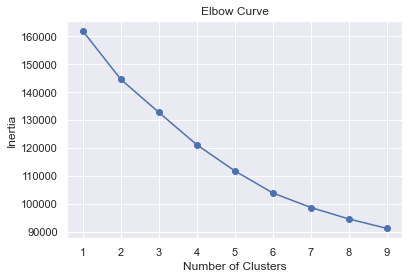

In [15]:
# Plot the Elbow Curve
plt.plot(range(1,K_max),inertias,marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

There's no obvious elbow in this case. Therefore, we will also plot a bar chart to visualize the changes.

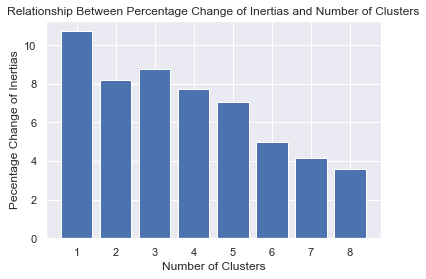

In [16]:
inertias_diff = [100*(inertias[i-1]-inertias[i])/inertias[i-1] for i in range(1,len(inertias))]
plt.bar(range(1,len(inertias)),inertias_diff)
plt.title('Relationship Between Percentage Change of Inertias and Number of Clusters')
plt.ylabel('Pecentage Change of Inertias')
plt.xlabel('Number of Clusters')
plt.show()

The change in inertias becomes relatively smaller when the cluster number exceeds 6. Consequently, we will opt for 6 clusters as our choice, as the inertia doesn't vary significantly with more than 6 clusters.

In [17]:
# Calculate the KMeans for the chosen number of cluster
# instantiate a Kmeans object
model = KMeans(n_clusters=6)

# create clusters
clusters = model.fit_predict(scaled_customer_df)

# append the inertia to the list
inertia = model.inertia_
inertias.append(inertia)
print(f"Number of clusters: {k}")
print(f"Inertia: {round(inertia,2)}")
print(f"Number of iteration: {model.n_iter_}")
print(f"Number of features: {model.n_features_in_}")

Number of clusters: 9
Inertia: 103874.58
Number of iteration: 27
Number of features: 16


## Data Analysis

To understand what each cluster means, we'll look at how certain factors vary in each cluster. This will help us see what types of customers are in each group and how we can adjust our business and marketing strategies accordingly.

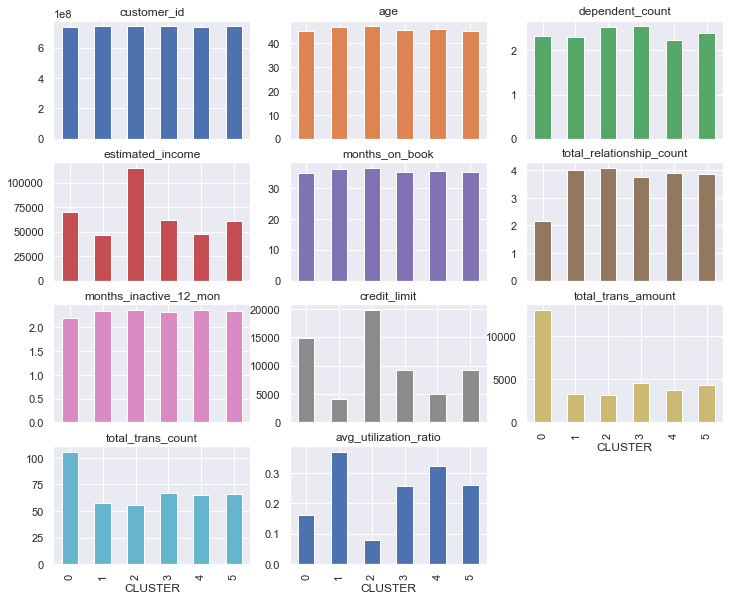

In [18]:
# Assign the cluster results to the original dataframe
customer_df['CLUSTER'] = clusters

# Group the numeric variable by the clusters
num_df = customer_df.select_dtypes(include=numerics)
columns = num_df.columns[:-1]
n_col = len(columns)

# Average of each group
cluster_mean = customer_df.groupby('CLUSTER')[columns].mean()

# Plot bar charts for each numeric atrribute
cluster_mean.plot(kind='bar',subplots=True,figsize=(12, 10),legend=False, layout=(4,3))
plt.show()

The six different clusters are grouped from Cluster 0 to Cluster 5. We will now highlight the main differences between these clusters:

The primary differences among the clusters are evident in the "estimated_income", "credit_limit", and "avg_utilization_ratio" variables, the former two exhibit similar bar chart patterns while "avg_utilization_ratio" appears to have a contrasting pattern. This aligns well with our Pearson correlation coefficient results, which show a positive 0.5 correlation coefficient between "credit_limit" and "estimated_income" and a negative 0.5 correlation coefficient between "avg_utilization_ratio" and "credit_limit."

Cluster 1 stands out compared to the other clusters, as it has the lowest average "total_relationship_count" and the highest averages for "total_trans_amount" and "total_trans_count." This suggests that customers in Cluster 1 spend more money overall and use their cards more frequently. However, these customers have a lower contact rate with the company.

In contrast, Cluster 3 has the highest estimated income ("estimated_income") and credit limits ("credit_limit"). However, this group of customers has the lowest daily average utilization ratio ("avg_utilization_ratio").

Two pairs of clusters exhibit similar patterns: (1) Clusters 0 and 5, and (2) Cluster 2 and Cluster 4, with minor differences in each feature. Moreover, Clusters 0 and 5 display slightly higher estimated incomes and lower "avg_utilization_ratio" values than the other pair. Notably, the "avg_utilization_ratio" is higher for Cluster 4 compared to Cluster 2.


We will now examine pairs of variables with a high correlation: 
1. "months_on_book" and "age" (CC=0.8)
2. "credit_limit" and "estimated_income" (CC=0.5)
3. "avg_utilization_ratio" and "credit_limit" (CC=-0.5)

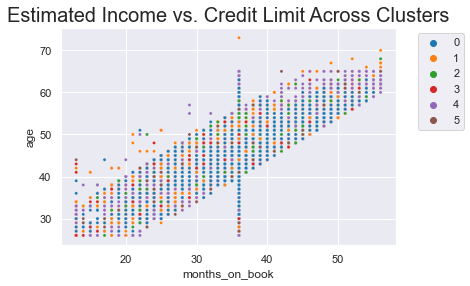

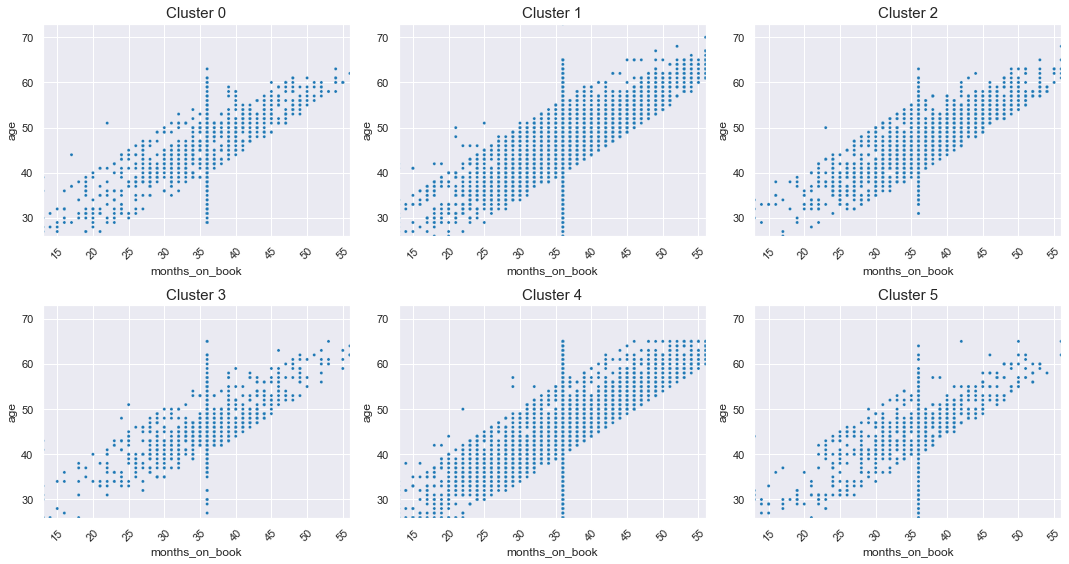

In [19]:
x_f = 'months_on_book'
y_f = 'age'

# Plot all the clusters
sns.scatterplot(data=customer_df,x=x_f,y=y_f,hue='CLUSTER',palette='tab10',s=10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Estimated Income vs. Credit Limit Across Clusters',fontsize = 20)
current_palette = sns.color_palette()

# Plot each cluster
fig, axes = plt.subplots(2,3,figsize=(15, 8))
for i in range(0,6):
    ax = axes[math.floor(i/3),i%3]
    g = sns.scatterplot(data=customer_df[customer_df['CLUSTER'] == i],
                        x=x_f,y=y_f,hue='CLUSTER',
                        palette='tab10',s=10,ax=ax)
    g.legend_.remove()
    ax.set_title(f'Cluster {i}',fontsize=15)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_xlim(customer_df[x_f].min(),customer_df[x_f].max())
    ax.set_ylim(customer_df[y_f].min(),customer_df[y_f].max())
fig.tight_layout()

The data exhibits a very high correlation between the two features. As a customer's age increases, their time as a customer also tends to be longer, which is logically consistent. Although there isn't much to differentiate each cluster using these two features alone, we can still observe a resemblance between two pairs: Cluster 0 and 5, and the other pair consisting of Cluster 2 and 4.

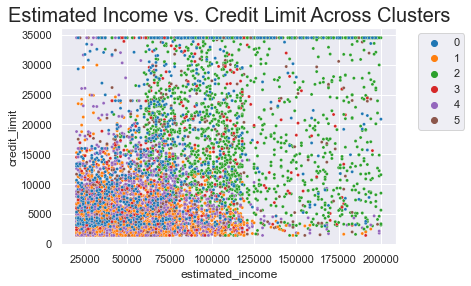

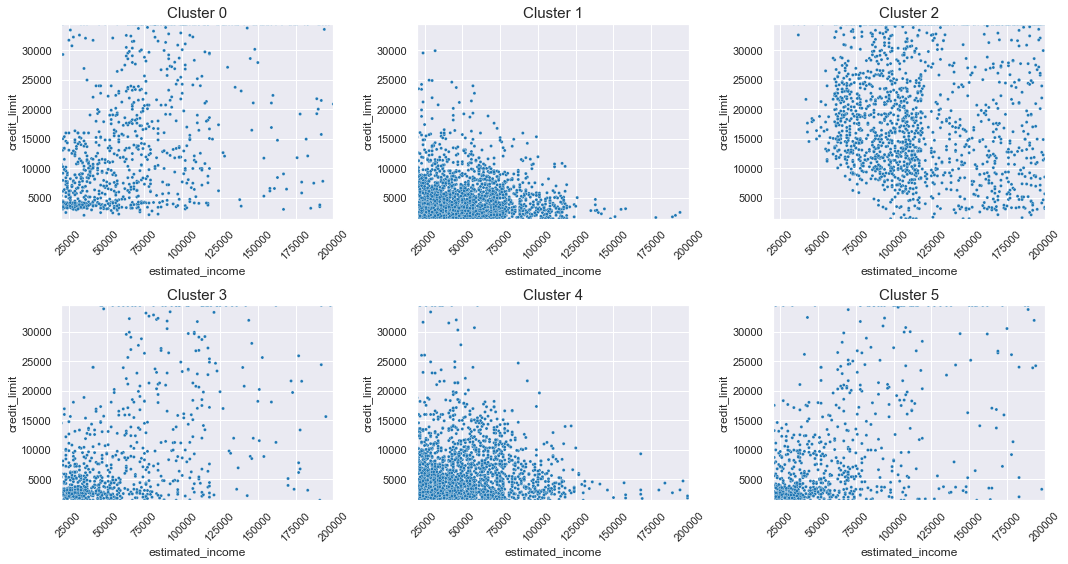

In [20]:
x_f = 'estimated_income'
y_f = 'credit_limit'

# Plot all the clusters
sns.scatterplot(data=customer_df,x=x_f,y=y_f,hue='CLUSTER',palette='tab10',s=10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Estimated Income vs. Credit Limit Across Clusters',fontsize = 20)
current_palette = sns.color_palette()

# Plot each cluster
fig, axes = plt.subplots(2,3,figsize=(15, 8))
for i in range(0,6):
    ax = axes[math.floor(i/3),i%3]
    g = sns.scatterplot(data=customer_df[customer_df['CLUSTER'] == i],
                        x=x_f,y=y_f,hue='CLUSTER',
                        palette='tab10',s=10,ax=ax)
    g.legend_.remove()
    ax.set_title(f'Cluster {i}',fontsize=15)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_xlim(customer_df[x_f].min(),customer_df[x_f].max())
    ax.set_ylim(customer_df[y_f].min(),customer_df[y_f].max())
fig.tight_layout()

As mentioned earlier, Cluster 3 exhibits the highest average credit limit and estimated income, resulting in a data distribution in the upper-right corner. It's evident that Cluster 0 shares similarities with Cluster 5, just as Cluster 2 resembles Cluster 4. The variations within and between these two pairs are primarily due to differences in density.  Cluster 2 and 4 have comparatively lower estimated income and credit limit. Interestingly, Cluster 1 also bears resemblance to the Cluster pairs 0 & 5 in this context.

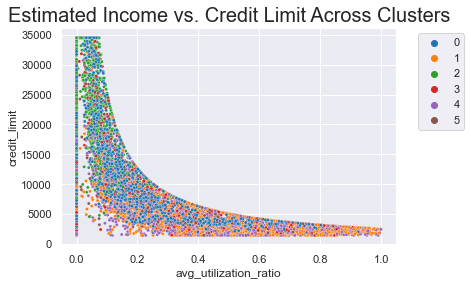

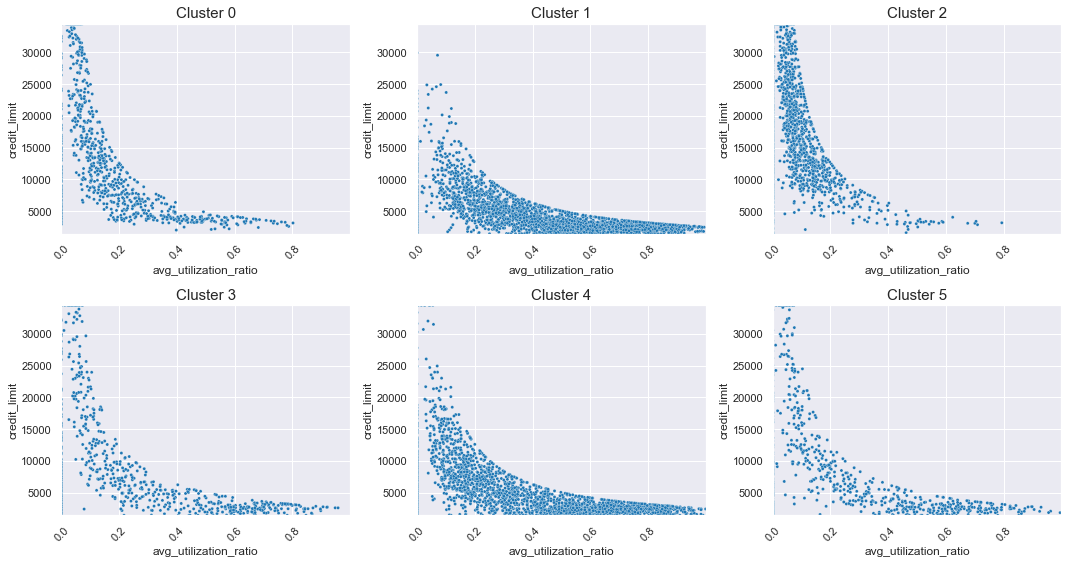

In [21]:
x_f = 'avg_utilization_ratio'
y_f = 'credit_limit'

# Plot all the clusters
sns.scatterplot(data=customer_df,x=x_f,y=y_f,hue='CLUSTER',palette='tab10',s=10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Estimated Income vs. Credit Limit Across Clusters',fontsize = 20)
current_palette = sns.color_palette()

# Plot each cluster
fig, axes = plt.subplots(2,3,figsize=(15, 8))
for i in range(0,6):
    ax = axes[math.floor(i/3),i%3]
    g = sns.scatterplot(data=customer_df[customer_df['CLUSTER'] == i],
                        x=x_f,y=y_f,hue='CLUSTER',
                        palette='tab10',s=10,ax=ax)
    g.legend_.remove()
    ax.set_title(f'Cluster {i}',fontsize=15)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_xlim(customer_df[x_f].min(),customer_df[x_f].max())
    ax.set_ylim(customer_df[y_f].min(),customer_df[y_f].max())
fig.tight_layout()

Generally, the daily average utilization ratio is much lower for customers with a higher credit limit. Cluster 2 and Cluster 4 exhibit significantly higher card usage and, consequently, lower credit limits when compared to the other clusters. Conversely, Cluster 3 displays much lower card usage and higher credit limits. The remaining clusters appear to have a relatively even distribution of card usage.


Let's examine how these clusters are distributed across different categories: gender, education level, and marital status.

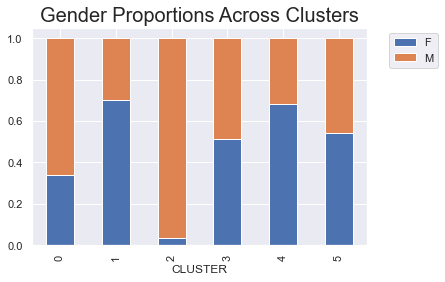

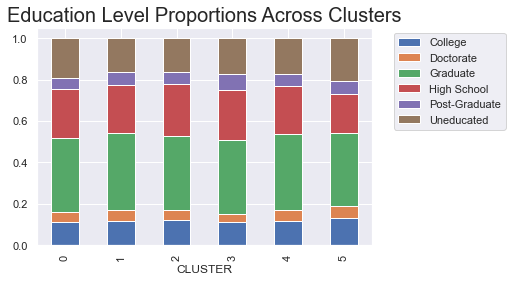

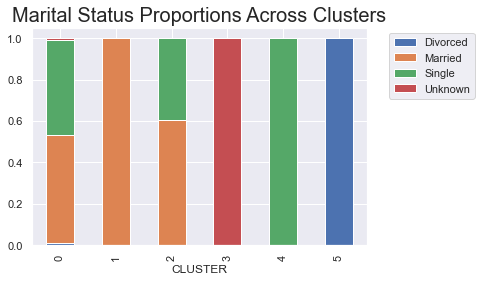

In [22]:
# Gender
col = 'gender'
plot_df = pd.crosstab(index=customer_df['CLUSTER'], columns=customer_df[col],normalize='index')
plot_df.plot.bar(stacked=True)
plt.title('Gender Proportions Across Clusters',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Education Level
col = 'education_level'
plot_df = pd.crosstab(index=customer_df['CLUSTER'], columns=customer_df[col],normalize='index')
plot_df.plot.bar(stacked=True)
plt.title('Education Level Proportions Across Clusters',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Marital Status
col = 'marital_status'
plot_df = pd.crosstab(index=customer_df['CLUSTER'], columns=customer_df[col],normalize='index')
plot_df.plot.bar(stacked=True)
plt.title('Marital Status Proportions Across Clusters',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


The gender distribution is balanced in Cluster 0 and Cluster 5. Cluster 2 and Cluster 4 have more female customers, while Cluster 1 has more male customers, and Cluster 3 is mostly comprised of male customers.

In terms of education level, each cluster exhibits similar proportions.

Notably, there is significant variation in marital status among the clusters. Cluster 0 primarily consists of divorced individuals, while Cluster 1 and Cluster 3 have a fairly balanced mix of married and single customers. Cluster 2 is predominantly composed of single individuals, Cluster 4 is mostly made up of married individuals, and the marital status of customers in Cluster 5 is unknown.

These results suggest that the distribution of clusters is influenced not only by customers' financial behavior but also by customer attributes such as gender, education level, and marital status.

# Conclusions

We have organized several clusters with attributes listed in the table:

|  Cluster  | Gender| Marital Status      |
| :-------: | :---: | :-----------------: |
| Cluster 0 | M ~= F|  Divorced           | 
| Cluster 1 | M > F |  Married & Single   | 
| Cluster 2 | M < F |  Single             | 
| Cluster 3 | M >> F|  Married & Single   | 
| Cluster 4 | M < F |  Married            | 
| Cluster 5 | M ~= F|  Unknown            | 

1. Cluster 0 (Divorced with Moderate Credit Limits, Estimated Incomes, and Transactions):

__Credit Rebuilding Card__: Offer credit cards designed specifically for individuals looking to rebuild their credit after a divorce. Provide lower credit limits, credit score tracking, and educational resources to help them improve their financial standing.

2. Cluster 1 (Higher Transaction Amount and Credit Card Usage, Less Contact with Company):

__Reward-Based Cards__: Introduce credit cards with attractive rewards programs, such as cashback or travel points, to incentivize higher card usage. Provide exclusive perks for loyal, high-transaction customers.

3. Cluster 2 (Single with Lower Credit Limit and Lower Daily Card Usage):

__Starter Credit Cards__: Create starter credit cards for singles with lower credit limits, focusing on easy approval and low annual fees. Include financial education resources to encourage responsible credit use.

4. Cluster 3 (Male Customers with High Credit Limit and Estimated Income, Lower Daily Card Usage):

__Premium Credit Cards__: Offer premium credit cards with higher credit limits and exclusive benefits tailored to affluent male customers, such as travel privileges, concierge services, and access to exclusive events.

5. Cluster 4 (Married Customers with Lower Credit Limit and Higher Daily Card Usage):

__Family-Focused Cards__: Introduce family-oriented credit cards with features like shared rewards, discounts on family-oriented purchases, and family travel benefits.

6. Cluster 5 (Similar to Cluster 0 but with Unknown Marital Status):

__Credit Rebuilding for All__: Extend credit rebuilding offers similar to Cluster 0, emphasizing financial recovery and credit score improvement, while accommodating customers with varying marital statuses.


In summary, through K-means analysis, we successfully categorized our customers into six distinct groups, enabling us to offer tailored business solutions for each.